In [37]:
import json
import numpy as np
import re

jobs = json.load(open('latency-matrix-results/i3en3xlarge.json'))['jobs'][1:]
p50 = []
p95 = []
r_iops = []
w_bw = []

last_bw_percent = 0
last_iops_percent = 0

last_reads_p95_line = [0]  # for 0, 0
last_reads_p50_line = [0]  # for 0, 0
p95mat = []
p50mat = []

for j in jobs:
    name = j['jobname']
    read_clat = j['read']['clat_ns']
    if 'percentile' in read_clat:
        this_p50 = float(read_clat['percentile']['50.000000']) * 1e-6
        this_p95 = float(read_clat['percentile']['95.000000']) * 1e-6
    else:
        this_p50 = 0.
        this_p95 = 0.
    p50.append(this_p50)
    p95.append(this_p95)
    r_iops.append(float(j['read']['iops']))
    w_bw.append(float(j['write']['bw_bytes']))
    m = re.match(r'(?:read|write)\(w=(\d+),r=(\d+)\)', name)
    bw_percent = int(m[1])
    iops_percent = int(m[2])
    if iops_percent < last_iops_percent:
        if last_reads_line is not None:
            p50mat.append(last_reads_p50_line)
            p95mat.append(last_reads_p95_line)
        last_reads_p50_line = []
        last_reads_p95_line = []
    last_iops_percent = iops_percent
    last_reads_p50_line.append(this_p50)
    last_reads_p95_line.append(this_p95)
p50mat.append(last_reads_p50_line)
p95mat.append(last_reads_p95_line)
p50mat = np.array(p50mat)
p95mat = np.array(p95mat)



<IPython.core.display.Javascript object>


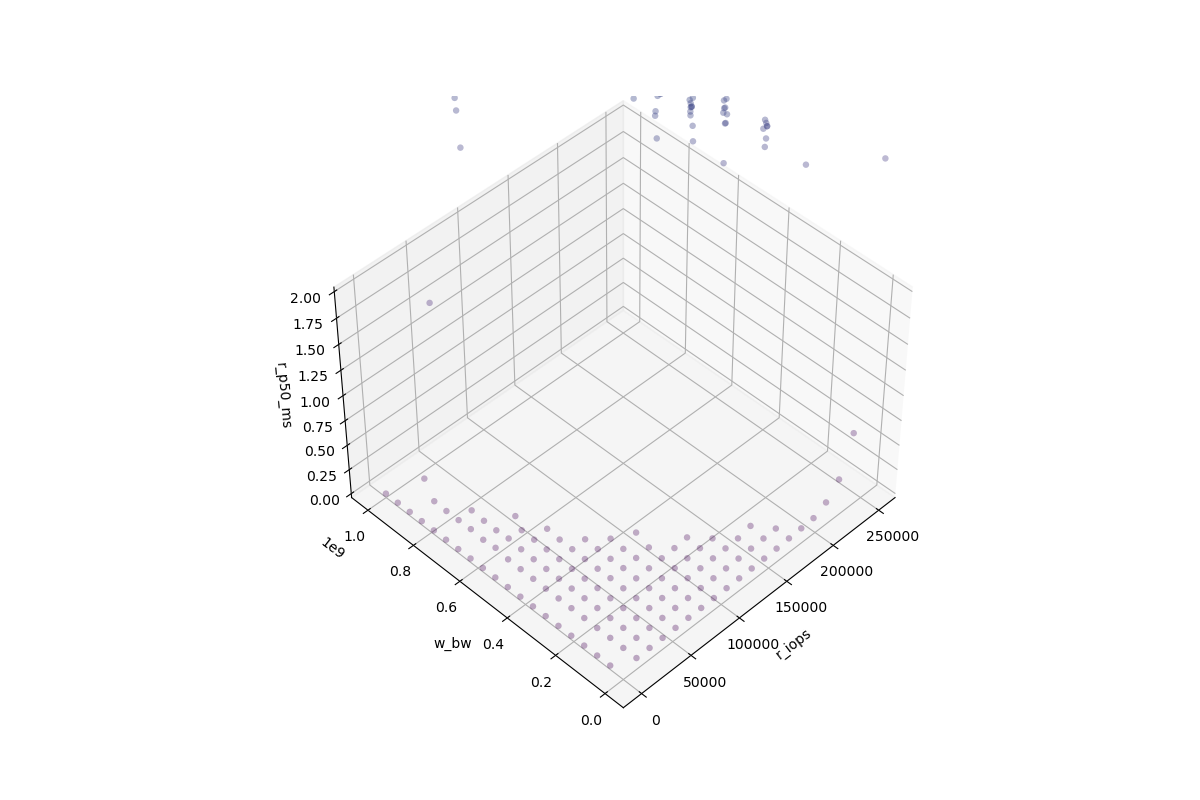

In [4]:

%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

plt.rcParams['figure.figsize'] = [12, 8]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('r_iops')
ax.set_ylabel('w_bw')
ax.set_zlabel('r_p50_ms')
ax.set_zlim(0, 2)

ax.scatter(r_iops, w_bw, p50, c=p50, cmap='viridis', linewidth=0.1)
ax.view_init(45, -135)

<IPython.core.display.Javascript object>


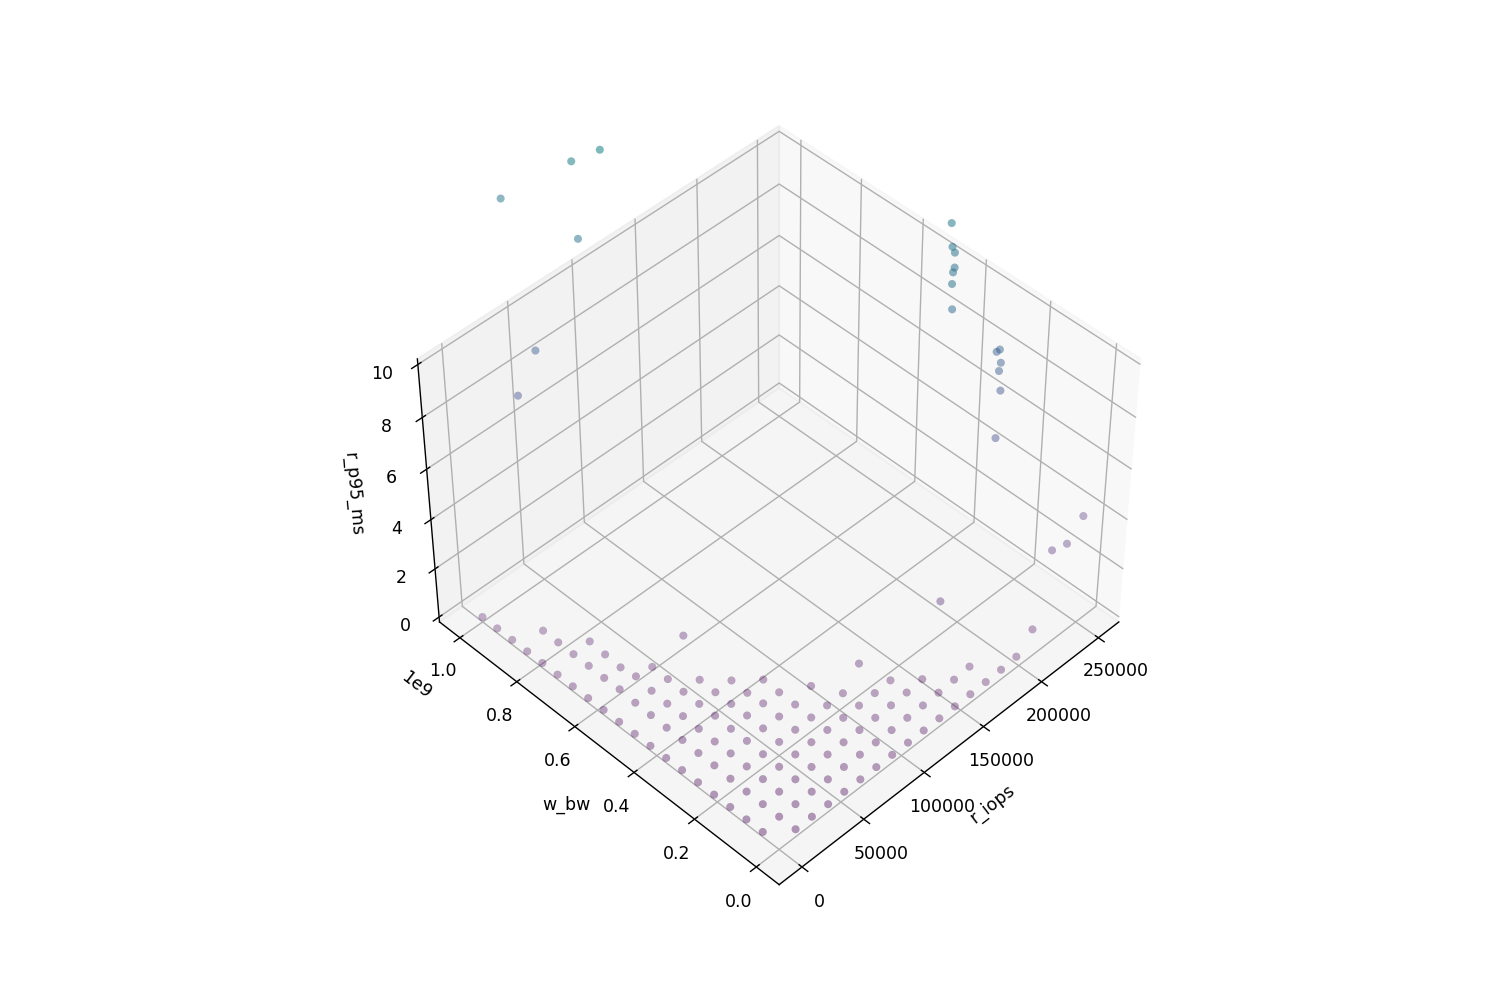

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

plt.rcParams['figure.figsize'] = [12, 8]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('r_iops')
ax.set_ylabel('w_bw')
ax.set_zlabel('r_p95_ms')
ax.set_zlim(0, 10)

ax.scatter(r_iops, w_bw, p95, c=p95, cmap='viridis', linewidth=0.1)
ax.view_init(45, -135)

<IPython.core.display.Javascript object>


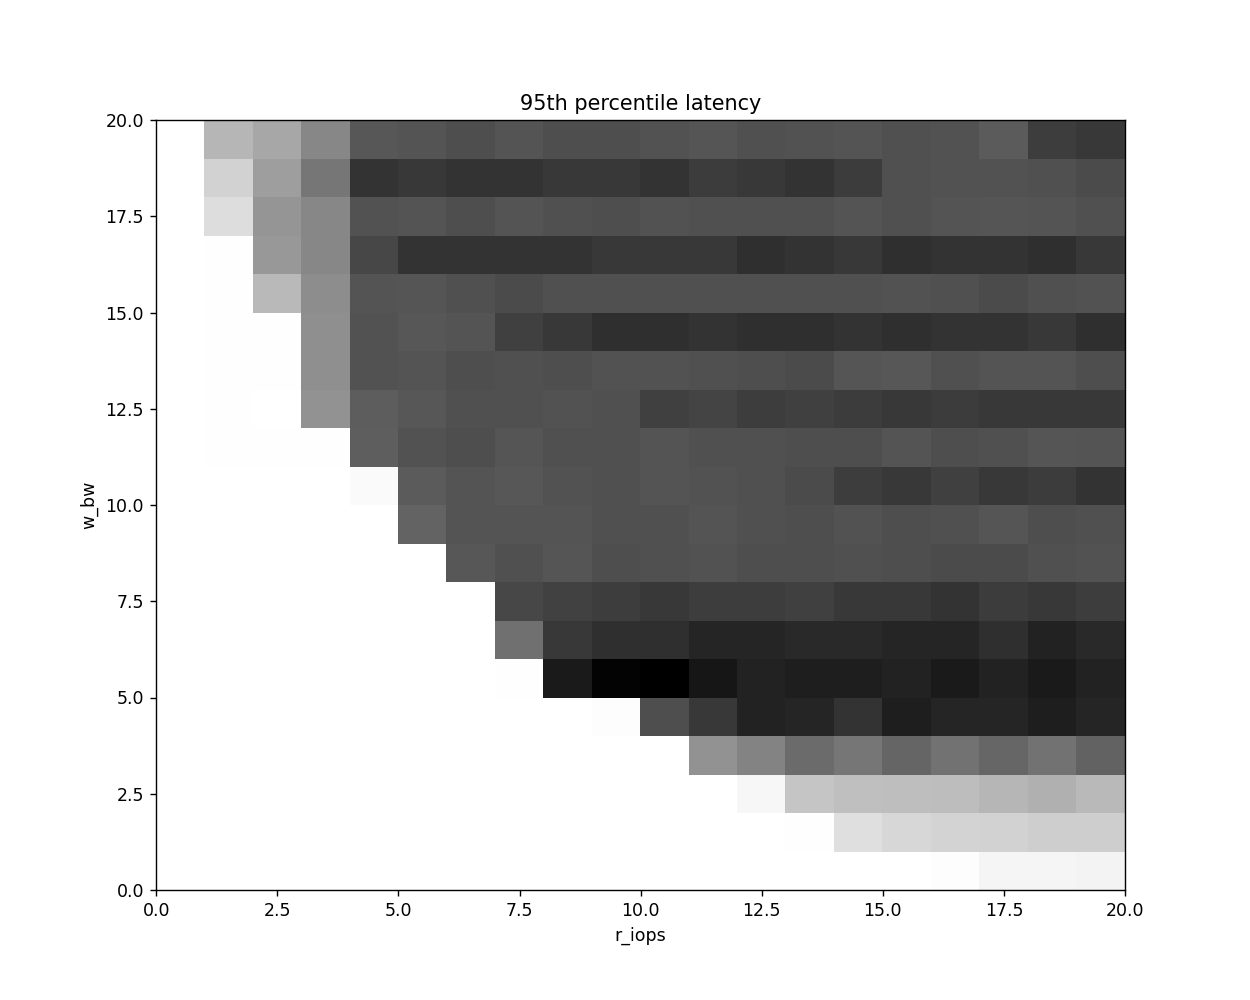

In [39]:
%matplotlib notebook

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

fig = plt.figure()
ax = plt.axes()

ax.set_title('95th percentile latency')
ax.set_xlabel('r_iops')
ax.set_ylabel('w_bw')
ax.pcolor(p95mat/2, cmap='Greys')



<IPython.core.display.Javascript object>


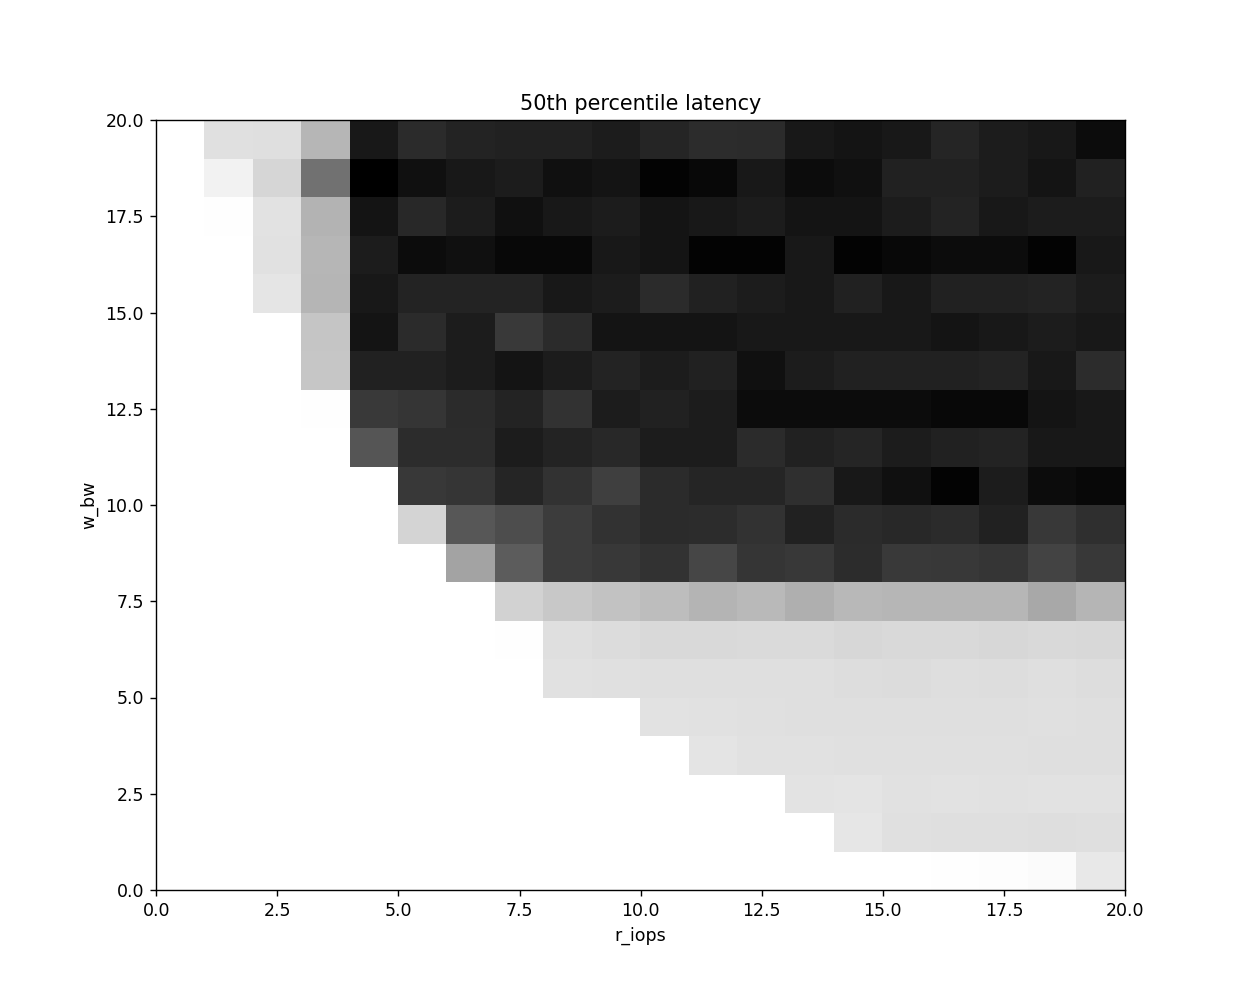

In [40]:
%matplotlib notebook

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

fig = plt.figure()
ax = plt.axes()

ax.set_title('50th percentile latency')
ax.set_xlabel('r_iops')
ax.set_ylabel('w_bw')
ax.pcolor(p50mat/2, cmap='Greys')

